In [1]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.core import *
from fastai.vision.models import resnet34, resnet18
from fastai.data.transforms import *
from pathlib import Path
import numpy as np
import cv2
import os
import sys
import shutil
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from segmentation_data import train_mask_fn, find_bounds, compute_confidence_score
import torch

In [2]:
learn = load_learner("/data/output/NLM_Shenzhen_Montgomery-06/segmentation-model.pkl", cpu=False)

test_images = None

with open("test_images.txt", "r") as test_file:
    test_images = [f.strip() for f in test_file.readlines()]

dl = learn.dls.test_dl(test_images, bs=16)
# learn.dls.batch_size = 16

inputs, preds, _, masks = learn.get_preds(dl=dl, with_input=True, with_decoded=True)
# print(preds.shape)
print(inputs.shape)
print(masks.shape)

torch.Size([12, 3, 224, 224])
torch.Size([12, 224, 224])


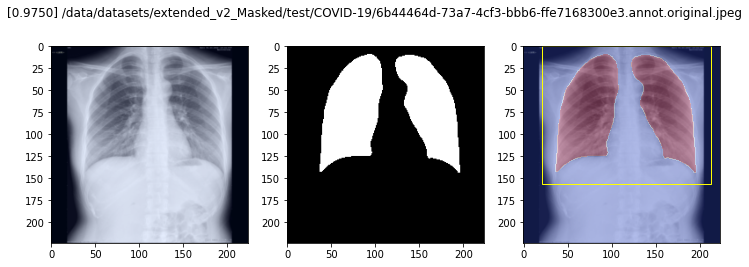

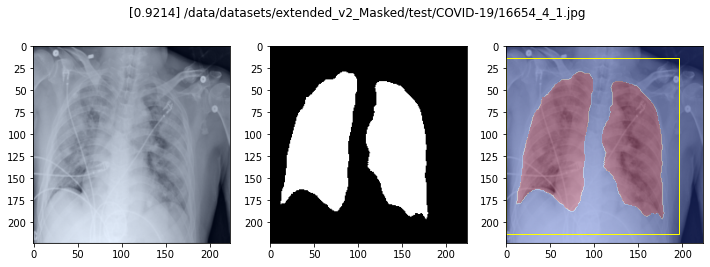

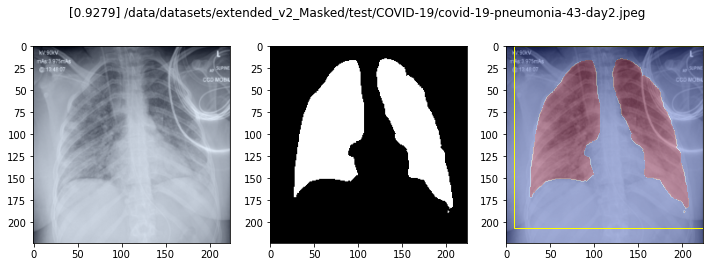

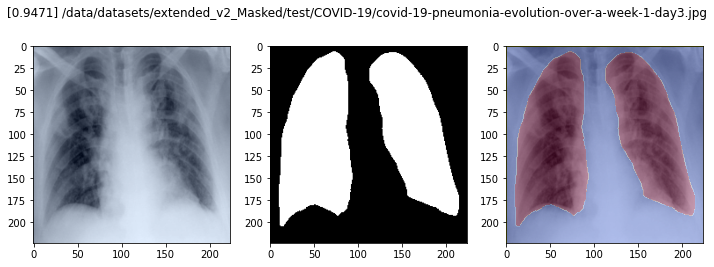

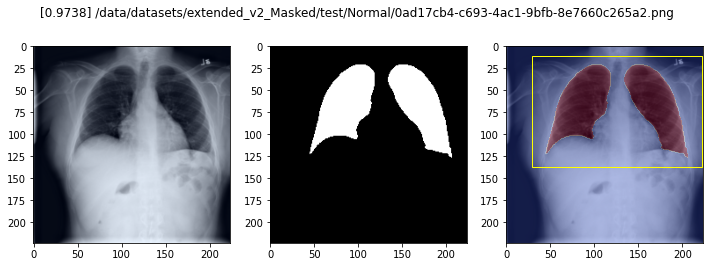

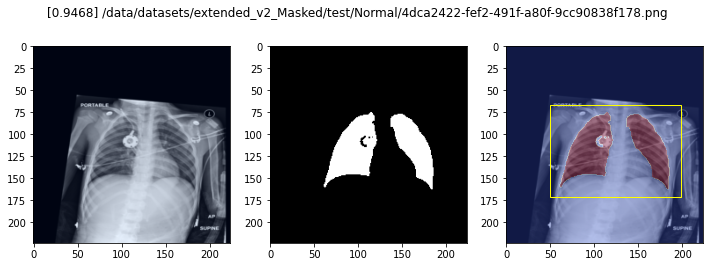

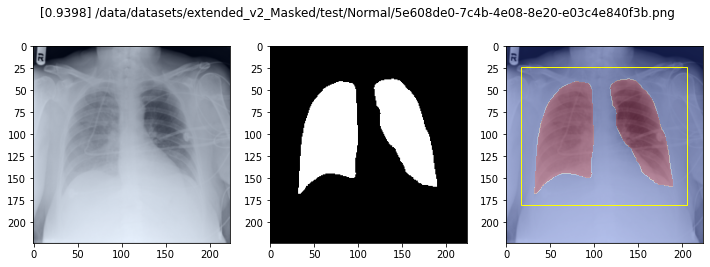

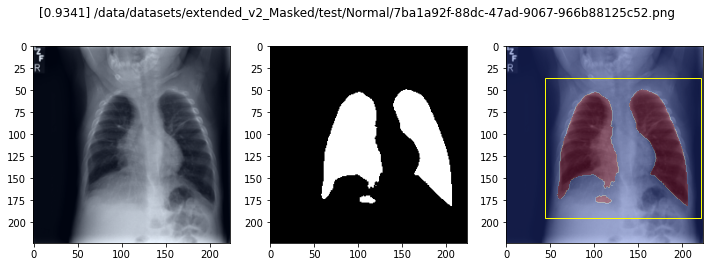

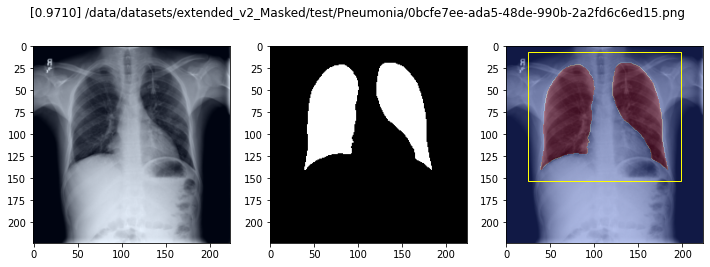

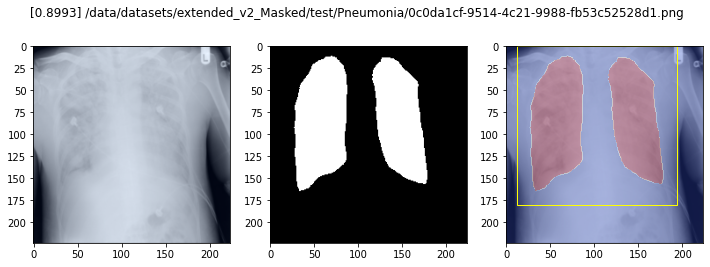

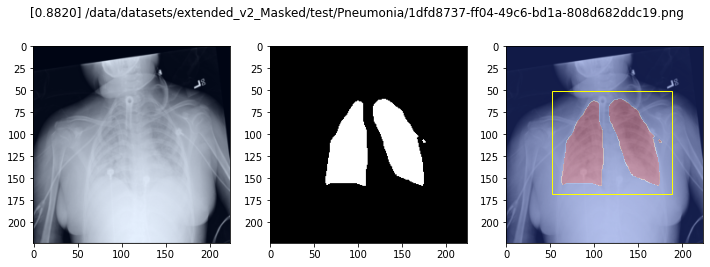

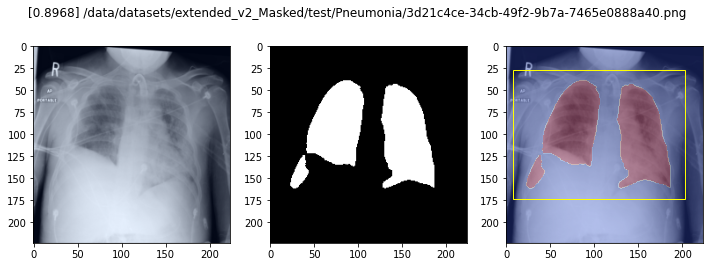

In [3]:
for img_file, img, pred, mask in zip(test_images, inputs, preds, masks):
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    
    img = np.transpose(img, (1, 2, 0))
    img = (img - torch.min(img)) / (torch.max(img) - torch.min(img))
    
    confidence = compute_confidence_score(pred, mask)
#     mask_preds = pred[1] * mask
#     confidence = np.true_divide(mask_preds.sum(), (mask_preds!=0).sum())
#     confidence = np.where(mask_preds > 0, mask_preds, 1.).min()
    
    ax[0].imshow(img)
    ax[1].imshow(mask, cmap='gray')
    bounds = find_bounds(mask, padding=0.1)
    ax[2].imshow(img)
    rect = patches.Rectangle((bounds[0], bounds[1]), bounds[2] - bounds[0], bounds[3] - bounds[1], linewidth=1, edgecolor='yellow', facecolor='none')
    ax[2].add_patch(rect)
    ax[2].imshow(mask, cmap='coolwarm', alpha=0.3)
#     fig.suptitle(f"[{confidence.numpy():.4f}] {img_file}")
    fig.suptitle(f"[{confidence:.4f}] {img_file}")
    plt.show()
    plt.close(fig)